In [15]:
# Importing the libraries
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

In [16]:
#Import the dataset
df=pd.read_csv("/content/conversion_data.csv")
df.head()

,Day,Conversion_A,Conversion_B
0,1,0.15,0.19
1,2,0.12,0.20
2,3,0.18,0.18
3,4,0.19,0.22
4,5,0.17,0.19


In [3]:
df.shape

(30, 3)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Day           30 non-null     int64  
 1   Conversion_A  30 non-null     float64
 2   Conversion_B  30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 848.0 bytes


In [5]:
#Data Description
df.describe()

,Day,Conversion_A,Conversion_B
count,30.000000,30.000000,30.000000
mean,15.500000,0.162000,0.193333
std,8.803408,0.036141,0.027334
min,1.000000,0.100000,0.150000
25%,8.250000,0.132500,0.180000
50%,15.500000,0.165000,0.190000
75%,22.750000,0.187500,0.200000
max,30.000000,0.230000,0.270000


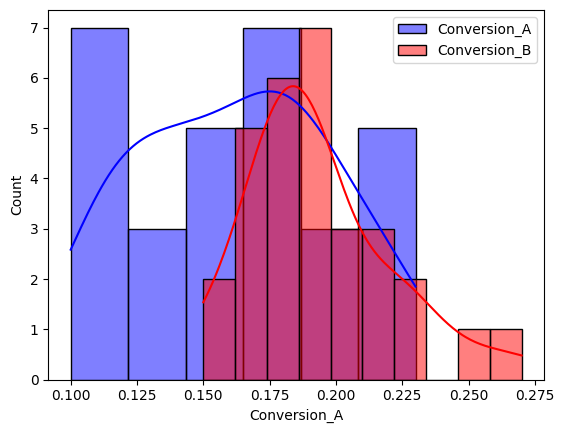

In [17]:
sns.histplot(df.Conversion_A, kde=True, color='blue', label='Conversion_A')
sns.histplot(df.Conversion_B, kde=True, color='red', label='Conversion_B')
plt.legend()
plt.show()

From the histogram, we can observe that:

Conversion_A (in blue) seems to have a wider spread than Conversion_B (in red).
Conversion_B appears to be slightly shifted towards higher values compared to Conversion_A, suggesting a potentially higher conversion rate for the B variant.

# Hypotheses
# H0: Mean of Conversion_A >= Mean of Conversion_B
# H1: Mean of Conversion_A < Mean of Conversion_B

*Note: If p-value is low, null hypothesis must go. IF p-value is high, null hypothesis must fly.



**Here we can perform the t test because the number of records less than or equal to 30 **

In [18]:
# T-test
t_stat, p_val = stats.ttest_ind(df.Conversion_B, df.Conversion_A, equal_var=True)
print(f"T-statistic: {t_stat}, P-value: {p_val}")

T-statistic: 3.787367930919289, P-value: 0.00036379601282876257


In [19]:
# Conclusion based on p-value
if p_val < 0.05:
    print("Reject H0: Newsletter B significantly outperforms Newsletter A.")
else:
    print("Fail to reject H0: No significant difference between Newsletter A and B.")

Reject H0: Newsletter B significantly outperforms Newsletter A.


**Here, our p-value is less than the significance level i.e 0.05. Hence, we can reject the null hypothesis. This means that in our A/B testing, newsletter B is performing better than newsletter A.**

**So, I recommend to replace the current newsletter with B to bring more traffic on the website.**